In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df = df.drop('Cabin', axis=1)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [12]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [17]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [18]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [19]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [22]:
y_pred = model.predict(X_test)

In [23]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Buat confusion matrix

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


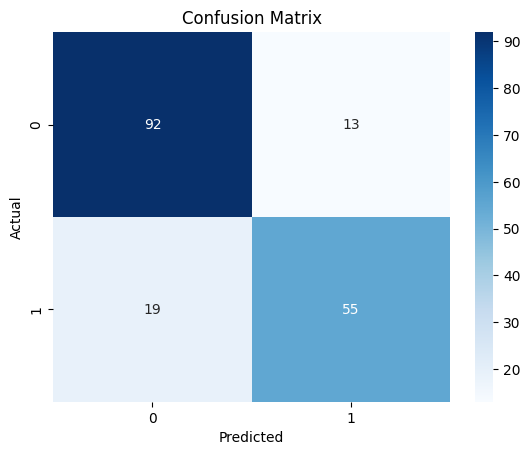

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hitung akurasi dari prediksi

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Feature importances (khusus random forest)

In [27]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


Analisa

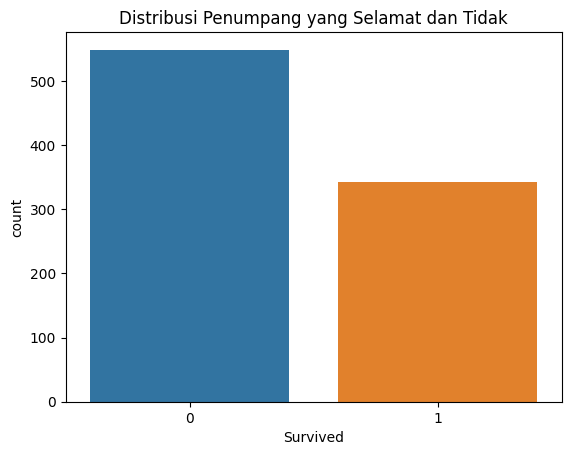

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Distribusi Penumpang yang Selamat dan Tidak')
plt.show()


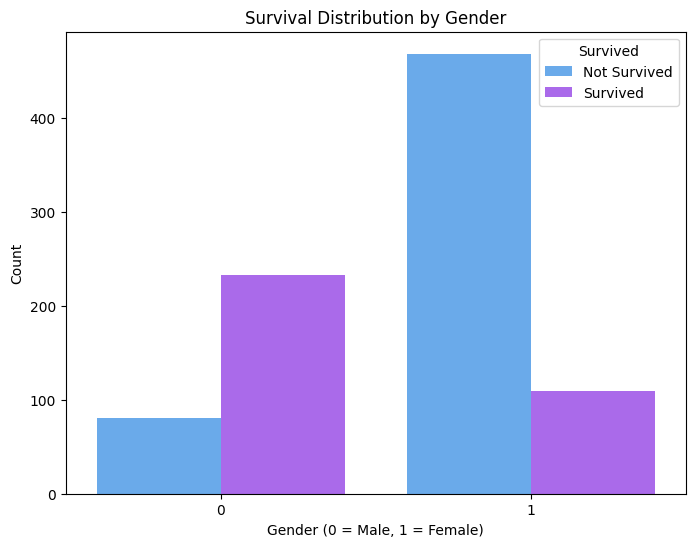

In [30]:
# Survival rate berdasarkan gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='cool')
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


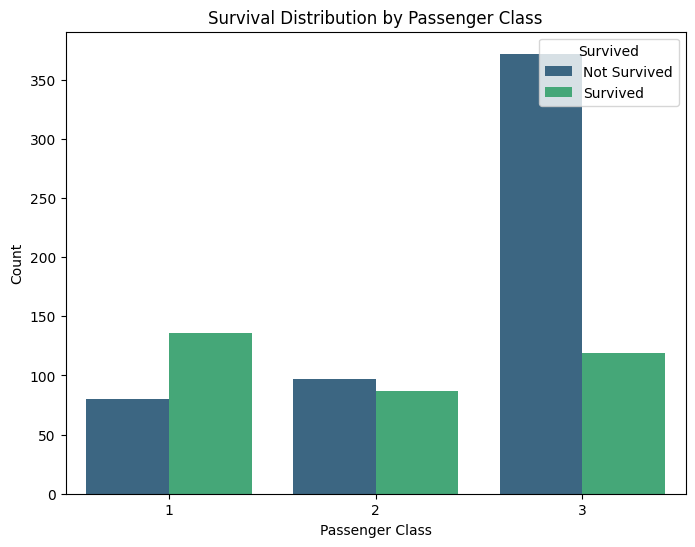

In [31]:
# Survival rate berdasarkan kelas penumpang
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


Preprocessing Data

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Mengatasi outliers pada 'Fare' menggunakan capping (Winsorization)
fare_upper_limit = df['Fare'].quantile(0.95)  # Batas atas pada persentil 95
df['Fare'] = df['Fare'].apply(lambda x: fare_upper_limit if x > fare_upper_limit else x)

# Scaling data numerik (Fare, Age)
scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

# Cek data setelah preprocessing
print(df[['Fare', 'Age']].head())


       Fare       Age
0 -0.700836 -0.565736
1  1.491434  0.663861
2 -0.677726 -0.258337
3  0.868903  0.433312
4 -0.673447  0.433312


Feature Engineering

In [2]:
import pandas as pd
import numpy as np

# Sample DataFrame setup (replace this with your actual data loading step)
data = {
    'PassengerId': [1, 2, 3, 4, 5],
    'Survived': [0, 1, 1, 1, 0],
    'Pclass': [3, 1, 3, 1, 3],
    'Name': [
        'Braund, Mr. Owen Harris',
        'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'Heikkinen, Miss. Laina',
        'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'Allen, Mr. William Henry'
    ],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'SibSp': [1, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan],
    'Embarked': ['S', 'C', 'S', 'S', 'S']
}

df = pd.DataFrame(data)

# 1. Title Extraction from Names
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# 2. Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3. IsAlone Feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 4. Fare Per Person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# 5. Deck Feature from Cabin
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

# 6. Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

# 7. One-Hot Encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 8. Interaction between Pclass and Sex
df['Pclass_Sex'] = df['Pclass'].astype(str) + "_" + df['Sex']

# 9. Impute Missing Values
# Use `transform` to keep the index consistent
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# View the modified DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Title  FamilySize  IsAlone  \
0      0         A/5 21171   7.2500   NaN    Mr           2        0   
1      0          PC 17599  71.2833   C85   Mrs           2        0   
2      0  STON/O2. 3101282   7.9250   NaN  Miss           1        1   
3      0            113803  53.1000  C

Model SVM

In [41]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Feature Engineering: Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# One-Hot Encoding categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns like 'Name', 'Ticket', 'PassengerId', 'Cabin'
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'])
y = df['Survived']

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Using 'mean' strategy for numerical columns
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scaling numerical features (such as 'Age' and 'Fare')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf' or 'poly'
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



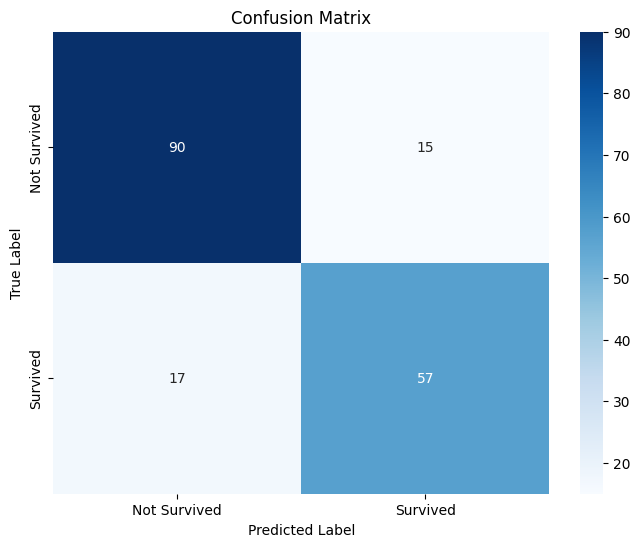

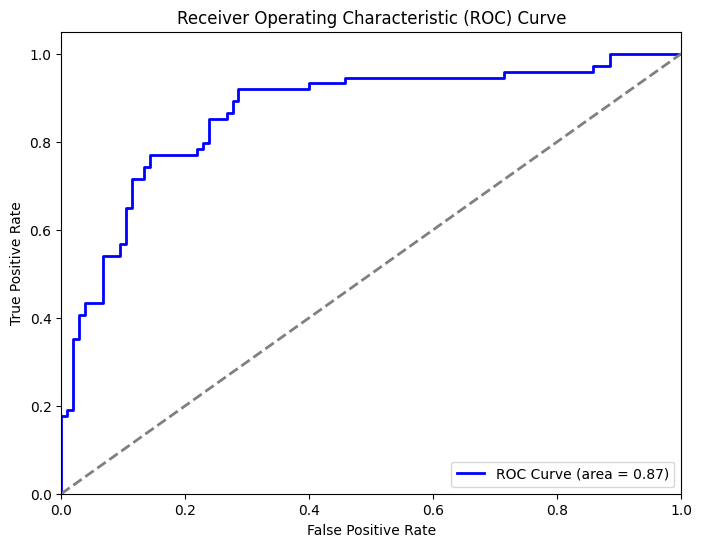

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


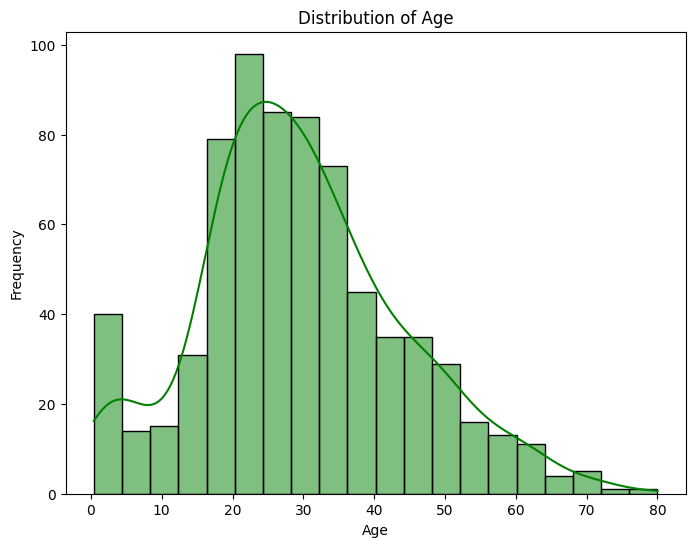

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


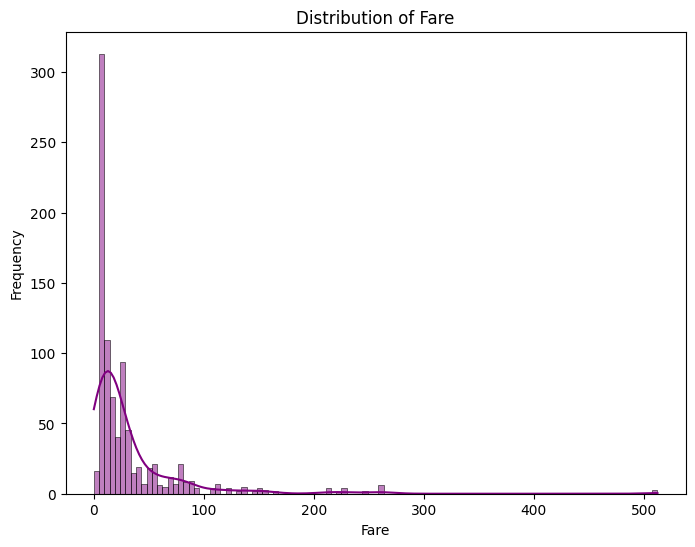

In [42]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Melatih model SVM dengan probability=True
svm_model = SVC(kernel='linear', probability=True)  # Mengaktifkan probabilitas prediksi
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Visualize the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, color='purple')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Model KNN

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



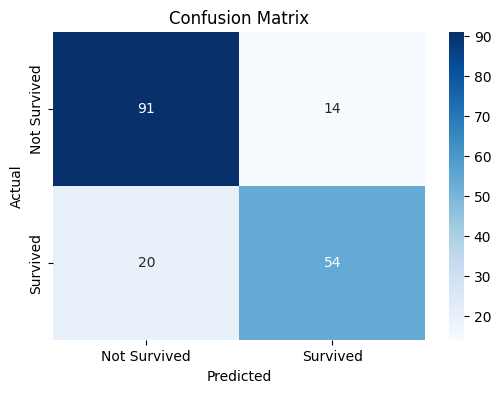

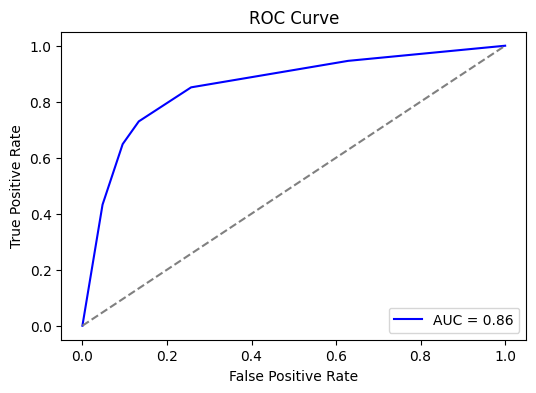

In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Existing imports and preprocessing steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Feature Engineering: Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# One-Hot Encoding categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns like 'Name', 'Ticket', 'PassengerId', 'Cabin'
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'])
y = df['Survived']

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Using 'mean' strategy for numerical columns
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scaling numerical features (such as 'Age' and 'Fare')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Visualization 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
